In [6]:
import numpy as np
from scipy.fftpack import fft
import os
from scipy.io import wavfile
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0,1.0/(2.0*T),N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])
    return xf,vals

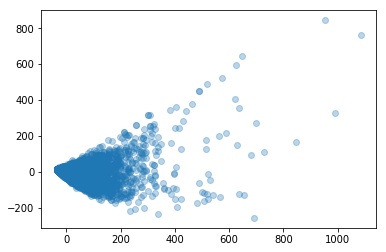

In [8]:
data_dir = 'C:/Users/user/Desktop/YongTaehoon/스터디/kaggle/03_Tensorflow_Speech_Recognition_Challenge/kaggle/train/'
train_audio_path = data_dir + 'train/audio/'
dirs = ['yes', 'no', 'up','down','left','right','on','off','stop','go']
fft_all = []
names = []
for direct in dirs:
    waves = [f for f in os.listdir(train_audio_path+direct) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + direct + '/' + wav)
        if samples.shape[0] != sample_rate :
            samples = np.append(samples,np.zeros((sample_rate - samples.shape[0],)))
        x, val = custom_fft(samples,sample_rate)
        fft_all.append(val)
        names.append(direct + '/' + wav)
        
fft_all = np.array(fft_all)

# 데이터 정규화
fft_all = (fft_all - np.mean(fft_all, axis=0)) / np.std(fft_all, axis = 0)

#PCA를 통해 2차원으로 축소
pca = PCA(n_components = 2)
fft_all = pca.fit_transform(fft_all)

#축소된 데이터를 시각화
plt.scatter(x = fft_all[:,0], y = fft_all[:,1], alpha = 0.3)

In [11]:
# x축 기준으로 800보다 큰 값 추출
for i in np.where(fft_all[:,0] > 800)[0]:
    print(names[i])

yes/5165cf0a_nohash_0.wav
yes/617de221_nohash_1.wav
yes/e4b02540_nohash_0.wav
stop/de41f895_nohash_1.wav
